In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
col=pd.read_csv("exercise_dataset.csv")
col               

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825
...,...,...,...,...,...,...
243,General cleaning,207,246,286,326,0.721008
244,"Cleaning, dusting",148,176,204,233,0.515199
245,Taking out trash,177,211,245,279,0.617427
246,"Walking, pushing a wheelchair",236,281,327,372,0.823236


In [4]:
col.head()

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825


In [5]:
col.tail()

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
243,General cleaning,207,246,286,326,0.721008
244,"Cleaning, dusting",148,176,204,233,0.515199
245,Taking out trash,177,211,245,279,0.617427
246,"Walking, pushing a wheelchair",236,281,327,372,0.823236
247,"Teach physical education,exercise class",236,281,327,372,0.823236


In [6]:
col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Activity, Exercise or Sport (1 hour)  248 non-null    object 
 1   130 lb                                248 non-null    int64  
 2   155 lb                                248 non-null    int64  
 3   180 lb                                248 non-null    int64  
 4   205 lb                                248 non-null    int64  
 5   Calories per kg                       248 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 11.8+ KB


In [7]:
col.shape

(248, 6)

In [8]:
col.describe()

,130 lb,155 lb,180 lb,205 lb,Calories per kg
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,389.754032,464.689516,539.685484,614.620968,1.359930
std,194.434028,232.019135,269.430029,306.847470,0.678851
min,89.000000,106.000000,123.000000,140.000000,0.310067
25%,236.000000,281.000000,327.000000,372.000000,0.823236
50%,354.000000,422.000000,490.000000,558.000000,1.234853
75%,472.000000,563.000000,654.000000,745.000000,1.647825
max,1062.000000,1267.000000,1471.000000,1675.000000,3.706591


In [9]:
col.isnull().sum()

Activity, Exercise or Sport (1 hour)    0
130 lb                                  0
155 lb                                  0
180 lb                                  0
205 lb                                  0
Calories per kg                         0
dtype: int64

<AxesSubplot:xlabel='130 lb', ylabel='Count'>

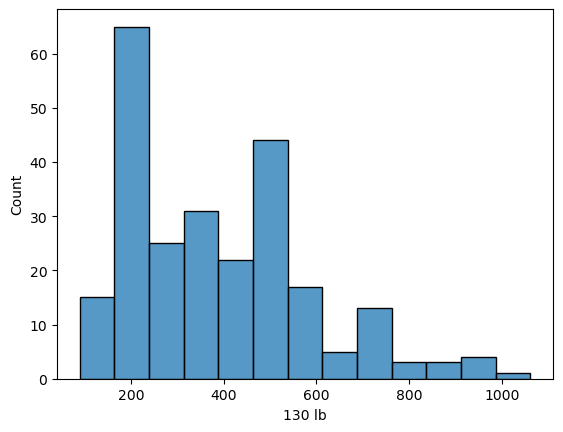

In [12]:
sns.histplot(x='130 lb',data=col)

In [13]:
y=col['Calories per kg']
y

0      1.750730
1      0.823236
2      3.294974
3      1.234853
4      1.647825
         ...   
243    0.721008
244    0.515199
245    0.617427
246    0.823236
247    0.823236
Name: Calories per kg, Length: 248, dtype: float64

In [16]:
x=col.drop(['Calories per kg','Activity, Exercise or Sport (1 hour)'],axis=1)
x

,130 lb,155 lb,180 lb,205 lb
0,502,598,695,791
1,236,281,327,372
2,944,1126,1308,1489
3,354,422,490,558
4,472,563,654,745
...,...,...,...,...
243,207,246,286,326
244,148,176,204,233
245,177,211,245,279
246,236,281,327,372


In [17]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

In [18]:
x.shape,X_train.shape,X_test.shape

((248, 4), (223, 4), (25, 4))

In [19]:
linear=LinearRegression()

In [20]:
linear.fit(X_train,y_train)
X_train_pred=linear.predict(X_train)
score=metrics.r2_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

linear.fit(X_test,y_test)
X_test_pred=linear.predict(X_test)
score=metrics.r2_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 1.0
accuracy score of test data: 1.0


In [21]:
forest=RandomForestRegressor()

In [22]:
forest.fit(X_train,y_train)
X_train_pred=forest.predict(X_train)
score=metrics.r2_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

forest.fit(X_test,y_test)
X_test_pred=forest.predict(X_test)
score=metrics.r2_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 0.9997966237823556
accuracy score of test data: 0.9859971535576976


In [25]:
input_data=(472,563,654,745)
input_as_np=np.asarray(input_data)
reshaped=input_as_np.reshape(1,-1)
prediction=linear.predict(reshaped)
prediction

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.64782527])

In [26]:
print('The Calories burnt are ',prediction[0])

The Calories burnt are  1.6478252656716401
